* layers of convolutions and maxpooling generates a visual hierarchy
* stride -- parameter, can skip a couple of pixels or span more pixels, a method of downsampling 
* radical downsampling 
* 



In [1]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))

print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small/train : 2
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


In [2]:
!ls

 1-model.h5	       'Day 2.ipynb'
 2-model.h5	        Day3_Categorical_Classification_with_NLP.ipynb
 3-model.h5	        Day3.ipynb
 4-model.h5	        Day4_CNNs.ipynb
 cats_vs_dogs	        Day4.ipynb
 cats_vs_dogs_small     Day5.ipynb
 Day1.ipynb	        junk.txt
'Day2_Fashion .ipynb'   train.zip


## plan

**Find data**
**Preprocessing data**
* resize
* labelling
* balance
* shuffle
* make splits (train/val/test)

**ANN Architecture**
* Layers
* I/O
* activation 
* compile
* optimizer
* loss
* metrics

**Training**
* define/optimize hyperparameters
* fit, including validation
* visualization

**Evaluate model**

**Deploy model**

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3),    #here the network will typically finding edges, generating a visual hierarchy, 32 different kinds of edges can generate lots of shapes
    activation="relu",
    input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu")) # neuron numbers increase typically as you wnt to extract
model.add(layers.MaxPooling2D((2, 2)))                  # then derived features from lower hierarchies (body parts)
model.add(layers.Conv2D(128, (3, 3), activation="relu")) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.25))  #a way to alleviate overfitting, activated when you do predict
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20, #grab 20 images from train_dir, rescale (normalize), resize, and then put it in binary mode
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode ="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
history = model.fit_generator( #the fit_generator prevents all data from memory to model on
    train_generator,
    steps_per_epoch=100, #another way of determining batchsize, batchsize = 2000/100 = 20
    epochs=30, #epoch = steps*batchsize
    validation_data=validation_generator,
    validation_steps=50 #batch size = 20, so 20*50=1000 
)

Epoch 1/30
100/100 [==============================] - 25s 252ms/step - loss: 0.6907 - acc: 0.5285 - val_loss: 0.6736 - val_acc: 0.5970
Epoch 2/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6658 - acc: 0.5940 - val_loss: 0.6541 - val_acc: 0.5980
Epoch 3/30
100/100 [==============================] - 29s 292ms/step - loss: 0.6298 - acc: 0.6440 - val_loss: 0.6161 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 29s 285ms/step - loss: 0.5924 - acc: 0.6885 - val_loss: 0.6651 - val_acc: 0.6140
Epoch 5/30
100/100 [==============================] - 28s 285ms/step - loss: 0.5553 - acc: 0.7215 - val_loss: 0.5726 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 29s 290ms/step - loss: 0.5208 - acc: 0.7455 - val_loss: 0.5867 - val_acc: 0.6970
Epoch 7/30
100/100 [==============================] - 29s 286ms/step - loss: 0.4951 - acc: 0.7705 - val_loss: 0.5794 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 2

Found 2000 images belonging to 2 classes.


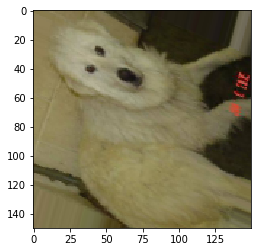

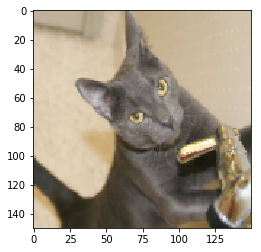

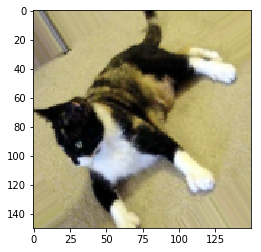

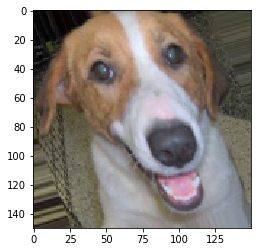

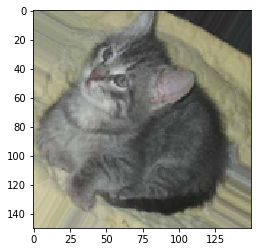

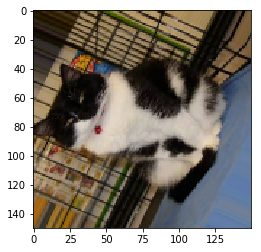

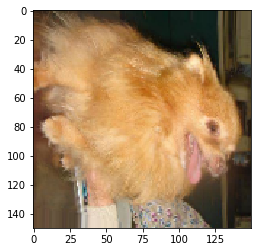

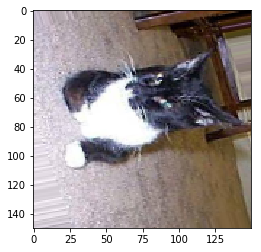

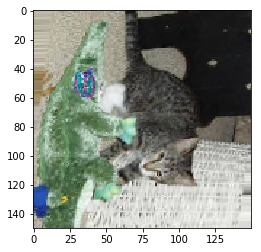

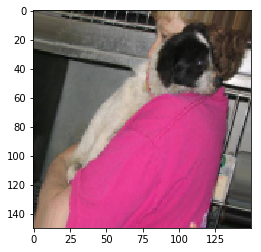

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'cats_vs_dogs_small/train'

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=100,
    shear_range=10,
    
    
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary"
)

import matplotlib.pyplot as plt

images, labels = next(generator)
for image in images:
    plt.imshow(image)
    plt.show()
    plt.close()

In [15]:
def generate(batch_size):
    i = 0
    while True:
        arr = []
        for _ in range(batch_size):
            i += 1
            arr.append(i)
        yield arr